<H1>1. Problem Description</H1>

Dataset of Water Quality

This dataset for beginners for practice

https://www.kaggle.com/datasets/adityakadiwal/water-potability

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.


In [339]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

%matplotlib inline

In [340]:
#print(os.getcwd())
df = pd.read_csv('..\data\water_potability.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

df.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<h1>2. EDA</h1>

<b>Fields Type</b>

In [341]:
df.dtypes

ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organic_carbon     float64
trihalomethanes    float64
turbidity          float64
potability           int64
dtype: object

<b>Check nulls, duplicates and Nuniques</b>

In [342]:
df.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64

The amount of missing data is 491+781+162, which is about a third of the data. 
Let's see the mean and median for the 3 features with missing values: ph, sulfate and Trihalomethanes.

In [343]:
df_trimmed = df.dropna(axis=0,inplace=False)
df_potable = df_trimmed[df_trimmed.potability== 1.0]
df_potable.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0
mean,7.113791,195.908341,22344.922883,7.174395,332.457832,425.005423,14.294764,66.581596,3.991254,1.0
std,1.437623,35.301146,8891.547966,1.732796,47.446190,81.950982,3.257917,16.297713,0.776408,0.0
min,0.227499,73.492234,1198.943699,1.390871,129.000000,201.619737,2.200000,8.577013,1.492207,1.0
25%,6.256039,174.380497,15816.076607,6.106169,301.768819,360.275012,12.148355,55.751069,3.440564,1.0
50%,7.046549,197.617494,21217.158596,7.212254,331.087177,421.099917,14.252684,66.612984,4.007347,1.0
75%,7.955161,218.414531,27696.134419,8.181431,365.632984,482.296528,16.561121,77.372587,4.527463,1.0
max,11.898078,317.338124,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [344]:
df_nonpotable = df_trimmed[df_trimmed.potability== 0.0]
df_nonpotable.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181,0.0
std,1.659106,30.717642,8461.108693,1.476577,36.398403,79.882677,3.370196,15.931953,0.782984,0.0
min,1.431782,98.452931,320.942611,2.456014,203.444521,210.319182,4.371899,14.343161,1.450000,0.0
25%,5.982888,177.313440,15378.907323,6.169384,310.653441,369.580980,12.118659,56.152070,3.444706,0.0
50%,6.992004,196.799368,20507.399647,7.103718,332.615625,424.479471,14.351828,66.206116,3.944085,0.0
75%,8.141979,214.532109,26786.546213,8.076759,356.432048,482.333786,16.787531,77.144621,4.497522,0.0
max,14.000000,300.292476,55334.702799,12.653362,460.107069,753.342620,27.006707,120.030077,6.494749,0.0


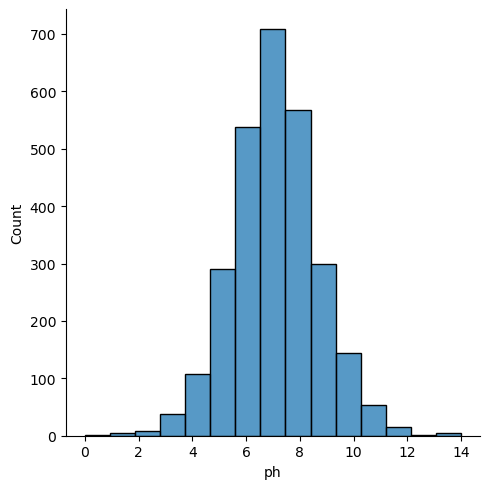

In [345]:
sns.displot(df.ph, bins=15, kde=False)
plt.show()

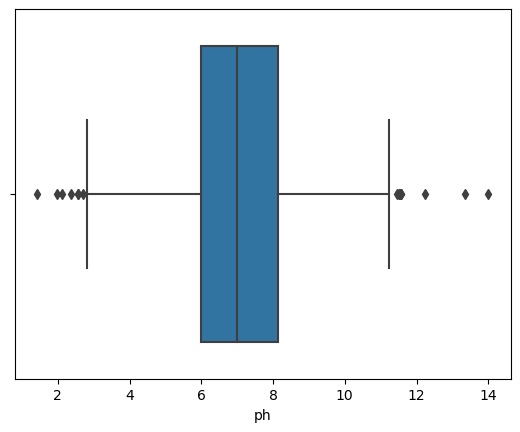

In [346]:
sns.boxplot(x=df_nonpotable.ph)
plt.show()

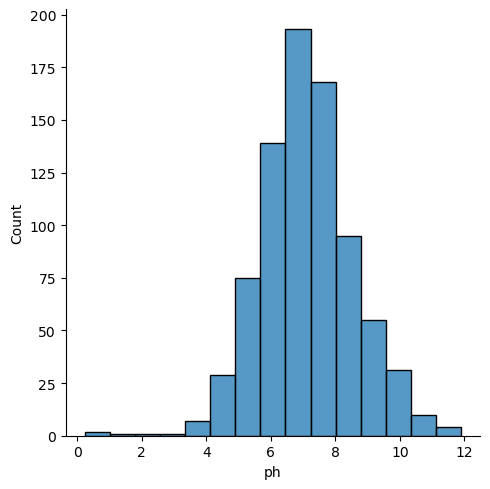

In [347]:
#df.ph.mean()
#df.ph.median()
sns.displot(df_potable.ph, bins=15, kde=False)
plt.show()

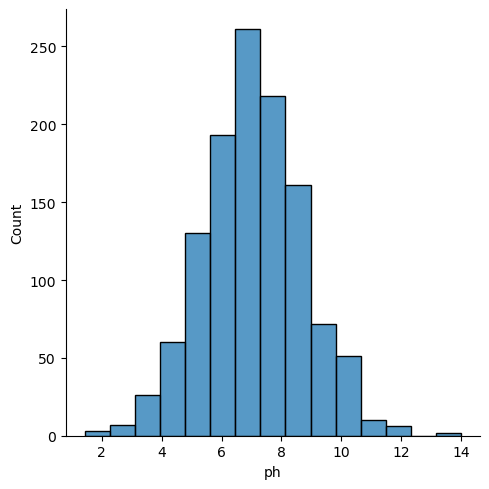

In [348]:
sns.displot(df_nonpotable.ph, bins=15, kde=False)
plt.show()

We see that there are different distributions to the potable and non potable values of pH.
We'll impute the data with KNN (K=3 Nearest Neighbours)

In [349]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_fixed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_fixed.head()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
0,NaN,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,NaN,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,NaN,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [350]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 3)
df_fixed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df_fixed.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [351]:
df_fixed.duplicated().sum()

0

In [352]:
df_fixed.nunique()

ph                 3254
hardness           3276
solids             3276
chloramines        3276
sulfate            3227
conductivity       3276
organic_carbon     3276
trihalomethanes    3274
turbidity          3276
potability            2
dtype: int64

<b>Clean columns from spaces</b>

In [353]:
categorical = df_fixed.select_dtypes(include="object").columns.tolist()
numerical = df_fixed.select_dtypes(exclude="object").columns.tolist()

print(df_fixed.columns)

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')


<b>FEATURES CORRELATION (numerical)</b>

In [354]:
df_fixed.groupby('turbidity').potability.mean()

turbidity
1.450000    0.0
1.492207    1.0
1.496101    0.0
1.641515    1.0
1.659799    1.0
           ... 
6.357439    0.0
6.389161    1.0
6.494249    1.0
6.494749    0.0
6.739000    0.0
Name: potability, Length: 3276, dtype: float64

Text(0.5, 1.0, 'Variable Correlation')

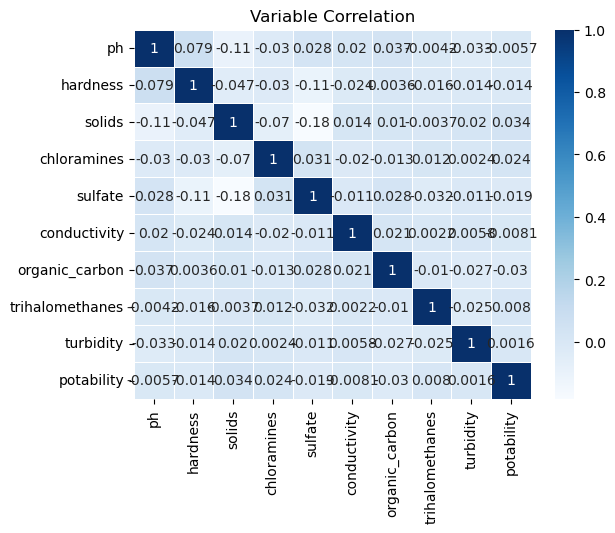

In [355]:
ax = sns.heatmap(df_fixed.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

No strong correlation between 2 variables.

<b>Price distribution</b>

<AxesSubplot:xlabel='potability', ylabel='Count'>

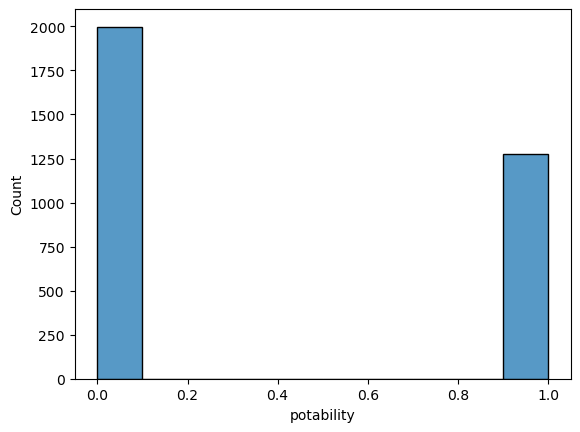

In [356]:
sns.histplot(df_fixed.potability, bins=10)

In [357]:
# from sklearn.metrics import mutual_info_score
# cpotability = pd.cut(df.potability, bins=10)
# def mutual_info_price_score(series):
#     return mutual_info_score(cpotability, series)

# mi = df[categorical].apply(mutual_info_price_score)
# print(mi)
# mi.sort_values(ascending=False)

<h1>3. Model Training</h1>

In [358]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

<b>Dataset subdivision (60-20-20)</b>

In [359]:
df_full_train, df_test = train_test_split(df_fixed, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [360]:
df_train = df_train.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.potability.values
y_full_train = df_full_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

del df_train['potability']
del df_val['potability']
del df_full_train['potability']
del df_test['potability']

In [361]:
numerical.pop()

'potability'

In [362]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dicts)
X_full_train = dv.transform(full_train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [363]:
dv.get_feature_names()

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['chloramines',
 'conductivity',
 'hardness',
 'organic_carbon',
 'ph',
 'solids',
 'sulfate',
 'trihalomethanes',
 'turbidity']

<b>Test multiple models and check RMSE best value</b>

In [364]:
model_RMSE_scores = {}

<b>LINEAR REGRESSION<b/>

In [365]:
from sklearn.linear_model import LinearRegression

In [366]:
list_RMSE = []

model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

RMSE: 0.4836550843248386


c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [367]:
key = 'Linear Regression RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE='])

In [368]:
model = LinearRegression(normalize=True)
model.fit(X_full_train, y_full_train)

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [369]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [370]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, 0.3852619639954935)

<b>RIDGE REGRESSION with alpha tuning<b/>

In [371]:
from sklearn.linear_model import Ridge

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

RMSE with alpha=0.0001: 0.4836550476207635
RMSE with alpha=0.001: 0.48365471804531274
RMSE with alpha=0.01: 0.4836514965215436
RMSE with alpha=0.05: 0.4836386953171893
RMSE with alpha=0.1: 0.4836257099450741
RMSE with alpha=0.2: 0.48360745267291266
RMSE with alpha=0.3: 0.48359655232329113
RMSE with alpha=0.4: 0.4835906256275843
RMSE with alpha=0.5: 0.48358811266080526
RMSE with alpha=0.6: 0.4835879657033319
RMSE with alpha=0.7: 0.4835894661212081
RMSE with alpha=1: 0.48359952432611986
RMSE with alpha=2: 0.4836451306570925
RMSE with alpha=3: 0.4836821330180111
RMSE with alpha=5: 0.4837294914451652
RMSE with alpha=10: 0.48378218440309473


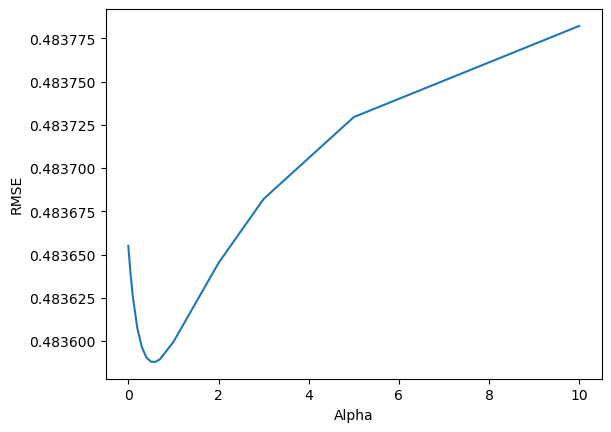

In [372]:
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 1, 2, 3, 5, 10]
list_RMSE = []

for i in list_alpha:
    model = Ridge(alpha=i, normalize=True, random_state=42)
    model.fit(X_full_train, y_full_train)
    y_pred = model.predict(X_test)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    list_RMSE.append(RMSE)
    print(f'RMSE with alpha={i}: {RMSE}')
    
plt.plot(list_alpha,list_RMSE)
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.show()


In [373]:
key = 'Ridge Regression (alpha 3) RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE='])

In [374]:
model = Ridge(alpha=3, normalize=True, random_state=42)
model.fit(X_full_train, y_full_train)

c:\ProgramData\Anaconda3\envs\ZoomMLCamp1\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=3, normalize=True, random_state=42)

In [375]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [376]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, 0.3932473474592964)

<b>SGD REGRESSION<b/>

In [377]:
from sklearn.linear_model import SGDRegressor

In [378]:
model = SGDRegressor(random_state=42)

model.fit(X_full_train, y_full_train)
y_pred = model.predict(X_val)

RMSE = mean_squared_error(y_val, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 1.777009303346633e+17


In [379]:
key = 'SGDRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE='])

In [380]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [381]:
y_pred = model.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, -5.274394016846045e+16)

<b>SVR REGRESSION<b/>

In [382]:
from sklearn.svm import SVR

In [383]:
clf_svr = SVR()
clf_svr.fit(X_full_train, y_full_train)
y_pred = clf_svr.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')



RMSE: 0.5540011794330868


In [384]:
key = 'SVR RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE='])

In [385]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [386]:
y_pred = clf_svr.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, 0.10069562164079843)

<b>RANDOM FOREST REGRESSION<b/>

In [387]:
from sklearn.ensemble import RandomForestRegressor

In [388]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_full_train,y_full_train)
y_pred = rf.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')


RMSE: 0.45799037427311645


In [389]:
key = 'RandomForestRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE='])

In [390]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [391]:
y_pred = rf.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, 0.4)

<b>DECISION TREE REGRESSION<b/>

In [392]:
from sklearn.tree import DecisionTreeRegressor

In [393]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_full_train,y_full_train)
y_pred = dt.predict(X_test)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {RMSE}')

RMSE: 0.6331782009405736


In [394]:
key = 'DecisionTreeRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE='])

In [395]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [396]:
y_pred = dt.predict(X)


original_price = y_test[3]
pred = y_pred


original_price, pred[0]

(0.0, 0.0)

<b>XgBOOST REGRESSION with eta, max_depth, max_child_weight TUNING<b/>

In [397]:
import xgboost as xgb

In [398]:
features = dv.get_feature_names_out ()
features

array(['chloramines', 'conductivity', 'hardness', 'organic_carbon', 'ph',
       'solids', 'sulfate', 'trihalomethanes', 'turbidity'], dtype=object)

In [399]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [400]:
watchlist = [(dfulltrain, 'train'), (dtest, 'test')]

In [401]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200, evals=watchlist, verbose_eval=5)

[0]	train-rmse:0.43950	test-rmse:0.48451
[5]	train-rmse:0.28917	test-rmse:0.47348
[10]	train-rmse:0.23054	test-rmse:0.47901
[15]	train-rmse:0.19290	test-rmse:0.47825
[20]	train-rmse:0.14194	test-rmse:0.48237
[25]	train-rmse:0.10986	test-rmse:0.48350
[30]	train-rmse:0.09343	test-rmse:0.48429
[35]	train-rmse:0.08012	test-rmse:0.48564
[40]	train-rmse:0.06577	test-rmse:0.48764
[45]	train-rmse:0.05727	test-rmse:0.48746
[50]	train-rmse:0.04357	test-rmse:0.48794
[55]	train-rmse:0.03575	test-rmse:0.48822
[60]	train-rmse:0.02662	test-rmse:0.48861
[65]	train-rmse:0.02250	test-rmse:0.48853
[70]	train-rmse:0.01906	test-rmse:0.48853
[75]	train-rmse:0.01493	test-rmse:0.48874
[80]	train-rmse:0.01235	test-rmse:0.48871
[85]	train-rmse:0.00953	test-rmse:0.48867
[90]	train-rmse:0.00767	test-rmse:0.48867
[95]	train-rmse:0.00675	test-rmse:0.48863
[100]	train-rmse:0.00568	test-rmse:0.48860
[105]	train-rmse:0.00464	test-rmse:0.48861
[110]	train-rmse:0.00375	test-rmse:0.48865
[115]	train-rmse:0.00306	test-rms

<b>10 Rounds has the best RMSE to start with</b>

In [402]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.4886517979865906

In [403]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)
record

{'ph': 7.16046723080874,
 'hardness': 183.0893100379288,
 'solids': 6743.346065530401,
 'chloramines': 3.8030364235979857,
 'sulfate': 277.5990986210596,
 'conductivity': 428.0363443504035,
 'organic_carbon': 9.79962468961304,
 'trihalomethanes': 90.03537367362071,
 'turbidity': 3.8848910441472793}

In [404]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(0.0, -0.021423642)

<b>PARAMETERS TUNING</b>

In [405]:
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

<b>ETA TUNING with 10 Rounds<b/>

In [406]:
scores = {}

In [407]:
%%capture output

xgb_params = {
    'eta': 1.0,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [408]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['eta=1.0'])

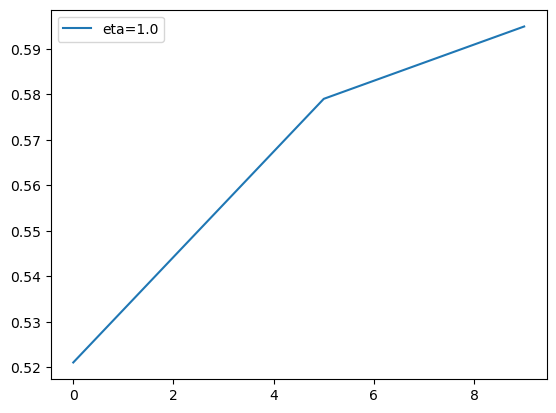

In [409]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

plt.legend()


In [410]:
# etas = ['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01']
# for eta in etas:
#     df_score = scores[eta]
#     plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

# plt.legend()

<b>eta=0.3 in 10 Rounds has the best RMSE<b/>

<b>max_weight TUNING<b/>

In [411]:
scores = {}

In [412]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 90,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [413]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=90'])

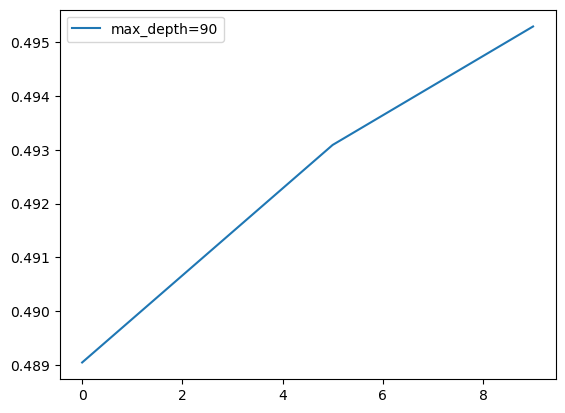

In [414]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)

    
plt.legend()

<b>max_weight=1 in 10 Rounds has the best RMSE<b/>

<b>min_child_weight TUNING<b/>

In [415]:
scores = {}

In [416]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 90,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10, evals=watchlist, verbose_eval=5)

In [417]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=90'])

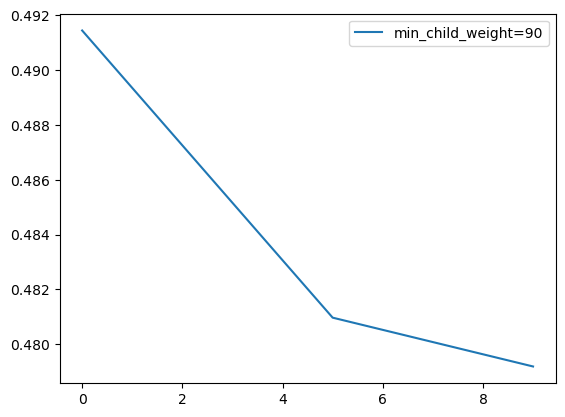

In [418]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

plt.legend()

<b>min_child_weight=10 in 10 Rounds has the best RMSE<b/>

<b>Train the model with the best parameters</b>

In [419]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 1,
    'min_child_weight': 10,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=10)

In [420]:
y_pred = model.predict(dtest)
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

0.4795955086004447

In [421]:
key = 'xgboostRegressor RMSE='
model_RMSE_scores[key] = RMSE
model_RMSE_scores.keys()

dict_keys(['Linear Regression RMSE=', 'Ridge Regression (alpha 3) RMSE=', 'SGDRegressor RMSE=', 'SVR RMSE=', 'RandomForestRegressor RMSE=', 'DecisionTreeRegressor RMSE=', 'xgboostRegressor RMSE='])

In [422]:
record = df_test.iloc[3].to_dict()
X = dv.transform([record])
dcheck = xgb.DMatrix(X, feature_names=features)

In [423]:
y_pred = model.predict(dcheck)


original_price = y_test[3]
pred = y_pred

original_price, pred[0]

(0.0, 0.447398)

In [424]:
model_RMSE_scores

{'Linear Regression RMSE=': 0.4836550843248386,
 'Ridge Regression (alpha 3) RMSE=': 0.48378218440309473,
 'SGDRegressor RMSE=': 1.777009303346633e+17,
 'SVR RMSE=': 0.5540011794330868,
 'RandomForestRegressor RMSE=': 0.45799037427311645,
 'DecisionTreeRegressor RMSE=': 0.6331782009405736,
 'xgboostRegressor RMSE=': 0.4795955086004447}

<h1>4. Exporting notebook to script</h1>

We found that Random Forest produces the best results.

<b>model.bin export data</b>

In [425]:
import pickle

In [426]:
model = rf

In [427]:
output_file = f'model.bin'

In [428]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv,model), f_out)

print(f'The Model is saved to {output_file}')

The Model is saved to model.bin
